Pour chaque  $k \in \mathbb{N}^*$ , soient
$$\eta^{(k)} = (\eta^{(k)}_1, \dots, \eta^{(k)}_k) \sim \mathcal M \left(k; \frac 1 k, \dots, \frac 1 k\right)$$
$$Y_k = \sum_{i=1}^k 1_{\eta^{(k)}_i > 0}$$

Considérons la chaîne de Markov $(X_t)_{t \ge 0}$ sur $\mathbb{N}^*$ où les probabilités de transition sont données par

$$\mathbb{P}(X_{t+1} = j \mid X_{t} = i) = \mathbb{P}(Y_i = j)$$

L’état  1  est le seul état absorbant. Nous nous intéressons au temps d’arrêt

$$\tau = \min \{t \ge 0 \mid X_t = 1\}$$

Ainsi qu’à la statistique

$$B_n = \sum_{t = 0}^{\min\{n,\tau\} - 1} X_t = \sum_{t = 0}^{n-1} X_t \cdot 1_{X_t > 1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# Compute law of Y

In [2]:
def simulate_markov_chain(n, t_max):
    """
    Simulates a Markov chain with a multinomial distribution as the transition matrix.

    Parameters:
    n (int): Initial state of the Markov chain
    t_max (int): Maximum number of steps to simulate

    Returns:
    X (list): Simulated states of the Markov chain
    tau (int): Stopping time
    """
    # Initialize the Markov chain
    X = [n]
    
    for t in range(t_max):
        # Simulate the next state
        r = np.random.multinomial(X[-1], [1/n]*n)
        # count > 0 entries
        X_t = sum([1 for i in r if i > 0])
        X.append(X_t)
        
        # Check if the stopping time has been reached
        if X[-1] == 0:
            return X, t
    return X, t_max

def compute_B_n(X, tau, n):
    """
    Computes the statistic B_n given the simulated Markov chain states.
    
    Parameters:
    X (list): Simulated states of the Markov chain
    tau (int): Stopping time
    n (int): Number of steps
    
    Returns:
    B_n (float): The computed statistic
    """
    min_n_tau = min(n, tau)
    B_n = sum(X[t] for t in range(min_n_tau) if X[t] > 1)
    return B_n

# Parameters
n = 10
t_max = 1000000

# Simulate the Markov chain
X, tau = simulate_markov_chain(n, t_max)

# Compute the statistic B_n
B_n = compute_B_n(X, tau, n)
print(f"B_n = {B_n}")

B_n = 39


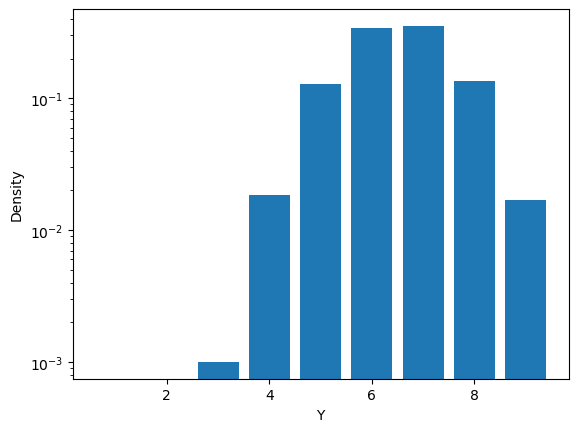

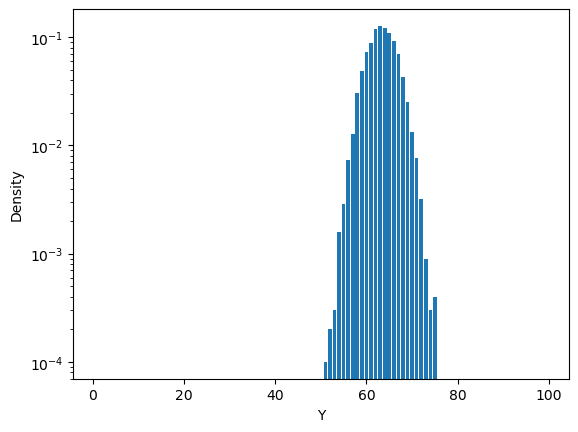

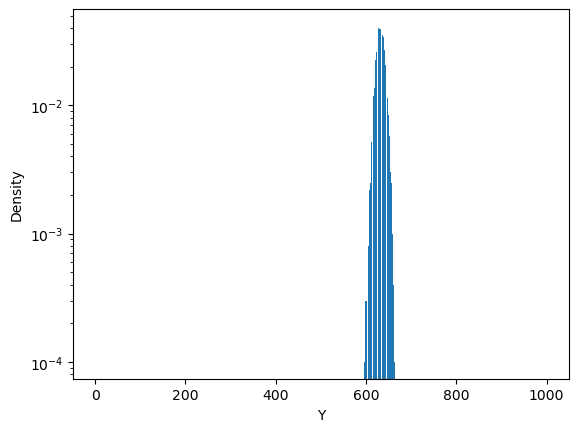

In [3]:
n = 100

def simulate_Y(n):
    parents = np.random.choice(n, size=n, replace=True)
    return len(set(parents))

def histogram(n):
    Y = [simulate_Y(n) for _ in range(10000)]
    plt.hist(Y, bins=range(1, n+1), density=True, log=True, align='left', rwidth=0.8)
    plt.xlabel('Y')
    plt.ylabel('Density')
    plt.show()

for n in [10, 100, 1000]:
    histogram(n)